## Altair

In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

#### Import the Data

* Here we can see the weather data from vega dataset

In [8]:
weather_data = data.seattle_weather()

weather_data.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


#### Describe data

In [9]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [10]:
weather_data.shape

(1461, 6)

In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null datetime64[ns]
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


#### Extracting the day, month, year from the data and drop the date column

In [12]:
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day

weather_data.drop('date', axis=1, inplace=True)

In [13]:
weather_data.head(10)

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5
5,2.5,4.4,2.2,2.2,rain,2012,1,6
6,0.0,7.2,2.8,2.3,rain,2012,1,7
7,0.0,10.0,2.8,2.0,sun,2012,1,8
8,4.3,9.4,5.0,3.4,rain,2012,1,9
9,1.0,6.1,0.6,3.4,rain,2012,1,10


In [14]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind,year,month,day
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2013.498973,6.522930,15.729637
std,6.680194,7.349758,5.023004,1.437825,1.118723,3.449884,8.803105
min,0.000000,-1.600000,-7.100000,0.400000,2012.000000,1.000000,1.000000
25%,0.000000,10.600000,4.400000,2.200000,2012.000000,4.000000,8.000000
50%,0.000000,15.600000,8.300000,3.000000,2013.000000,7.000000,16.000000
75%,2.800000,22.200000,12.200000,4.000000,2014.000000,10.000000,23.000000
max,55.900000,35.600000,18.300000,9.500000,2015.000000,12.000000,31.000000


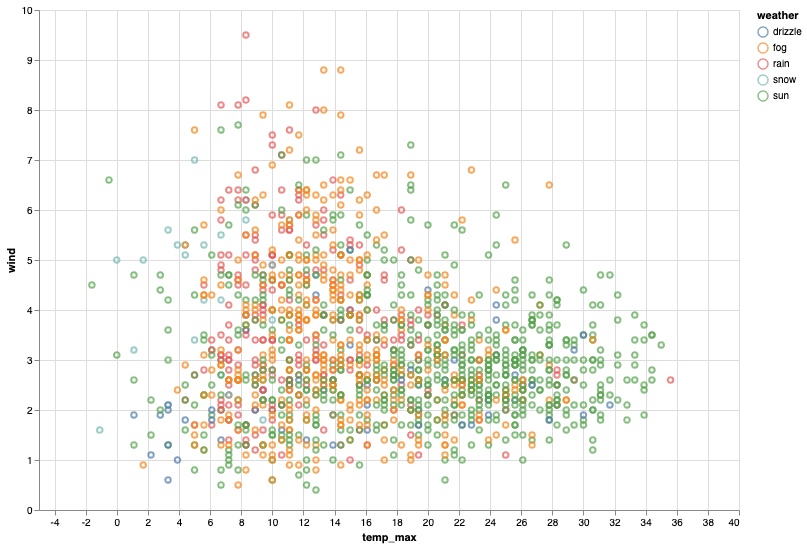

In [22]:
alt.Chart(weather_data, height=500, width=700) \
   .mark_point() \
   .encode(x='temp_max:Q', 
           y='wind:Q', 
           color='weather:N', 
           tooltip=['weather', 'temp_max']) \
   .interactive()

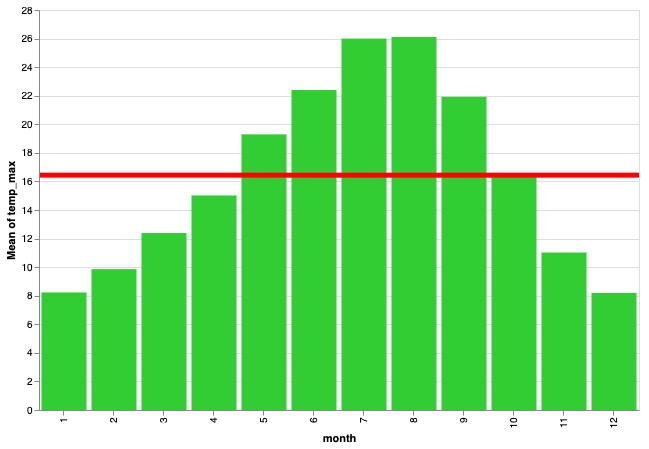

In [25]:
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart(height=400, width=600) \
          .mark_bar(color='limegreen') \
          .encode(x='month:O', 
                  y='mean(temp_max):Q', 
                  opacity=alt.condition(brush, 
                                        alt.OpacityValue(1), 
                                        alt.OpacityValue(0.5))) \
          .add_selection(brush)

line = alt.Chart() \
          .mark_rule(color='red') \
          .encode(y='mean(temp_max):Q', 
                  size=alt.SizeValue(5)) \
          .transform_filter(brush)

alt.layer(bars, line, data=weather_data)

* If we will take the precipitation and temp_max column and check the wind in both of them
* Select the region in the first plot and see the next plot what is the relationship between two

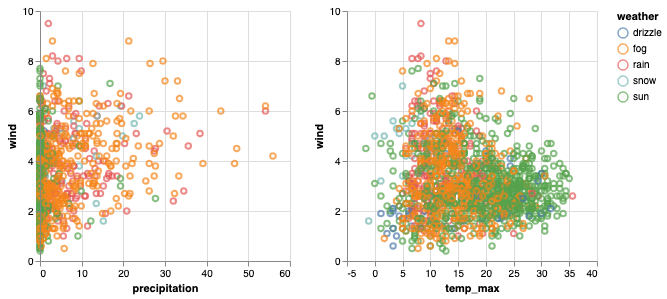

In [26]:
chart = alt.Chart(weather_data, height=400, width=600) \
           .mark_point() \
           .encode(y='wind:Q', 
            color=alt.condition(brush, 
                                'weather:N', 
                                alt.value('lightgray'))) \
           .properties(width=250, height=250) \
           .add_selection(brush)

chart.encode(x='precipitation:Q') | chart.encode(x='temp_max:Q')

In this plot you can choose the year and find the weather according to the month of each year

In [31]:
slider = alt.binding_range(min=2012, max=2015, step=1)

select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2012})

In [32]:
color = alt.Scale(domain=('drizzle', 'rain', 'sun', 'snow', 'fog'), 
                  range=['steelblue', 'yellow','red', 'green', 'violet'])

By using the slider we can see the weather condition for different different year

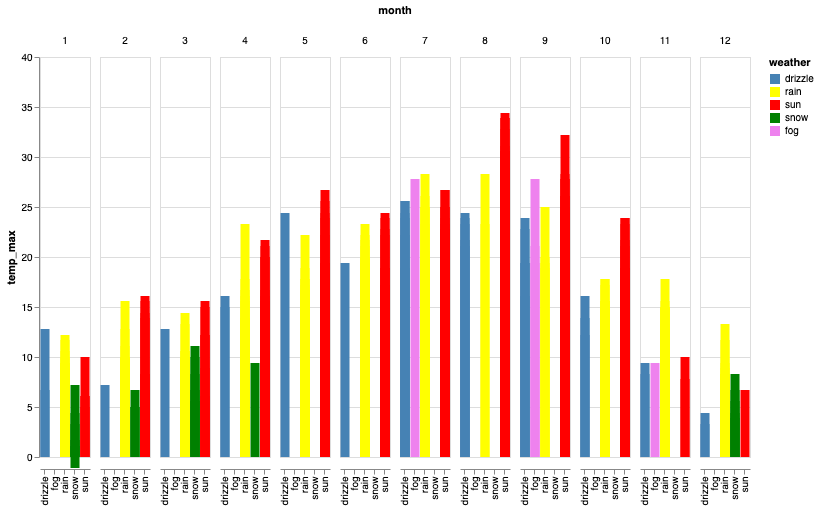

In [35]:
alt.Chart(weather_data, height=400, width=600) \
   .mark_bar() \
   .encode(x=alt.X('weather:N', title=None), 
           y=alt.Y('temp_max:Q', 
                   scale=alt.Scale(domain=(0, 40))), 
           color=alt.Color('weather:N', scale=color), 
           column='month:O', tooltip=['precipitation']) \
   .properties(width=50) \
   .add_selection(select_year) \
   .transform_filter(select_year) \
   .configure_facet(spacing=8)